In [1]:
import numpy as np
import pandas as pd

In [15]:
data=pd.read_csv("output.csv177.csv.csv")

In [16]:
data.head()

,Unnamed: 0,Address,Lat,Long,Provider
0,0,"Sector 2B Vasundhara, Ghaziabad",28.670470,77.381040,arcgis
1,1,"Block 8, Sector 3, Rajendra NagarGhaziabad, Ut...",28.692445,77.347810,arcgis
2,2,"Arthala, Mohan NagarGhaziabad, Uttar Pradesh 2...",28.688060,77.374885,arcgis
3,3,"Gali Number 4Arthala, Mohan NagarGhaziabad, Ut...",28.688060,77.374885,arcgis
4,4,"Shyam Park Extension, Ghaziabad",28.679920,77.363930,arcgis


In [17]:
df=pd.DataFrame(data)
df.head()

,Unnamed: 0,Address,Lat,Long,Provider
0,0,"Sector 2B Vasundhara, Ghaziabad",28.670470,77.381040,arcgis
1,1,"Block 8, Sector 3, Rajendra NagarGhaziabad, Ut...",28.692445,77.347810,arcgis
2,2,"Arthala, Mohan NagarGhaziabad, Uttar Pradesh 2...",28.688060,77.374885,arcgis
3,3,"Gali Number 4Arthala, Mohan NagarGhaziabad, Ut...",28.688060,77.374885,arcgis
4,4,"Shyam Park Extension, Ghaziabad",28.679920,77.363930,arcgis


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

/home/ashuposh/myenv/myenv/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


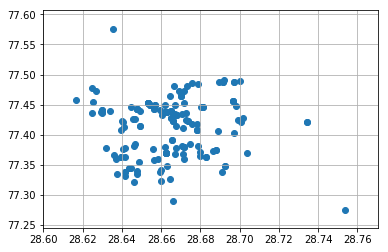

In [19]:
plt.figure(0)
plt.grid("on")
plt.scatter(df['Lat'], df['Long'])
plt.show()

In [20]:
df1=pd.DataFrame()
df1=df[['Lat','Long']]
df1.head()

,Lat,Long
0,28.670470,77.381040
1,28.692445,77.347810
2,28.688060,77.374885
3,28.688060,77.374885
4,28.679920,77.363930


In [33]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=1)
kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
colmap = {1: 'r', 2: 'g', 3: 'b'}

In [35]:
labels = kmeans.predict(df1)
centroids = kmeans.cluster_centers_

In [36]:
colors = map(lambda x: colmap[x+1], labels)
colors1=list(colors)

/home/ashuposh/myenv/myenv/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


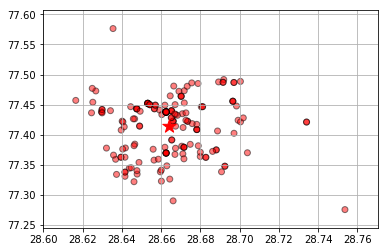

In [37]:
plt.figure(0)
plt.grid("on")

plt.scatter(df1['Lat'], df1['Long'], color=colors1, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1], s=200,marker='*')
plt.show()

In [38]:
import geocoder
for i in range(centroids.shape[0]):
    g = geocoder.osm(list(centroids[i]), method='reverse')
    print(g)


<[OK] Osm - Reverse [Ghaziabad, Uttar Pradesh, 201001, India]>
